In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
# Step 1: Fix duplicate feature names
unique_features = []
seen = {}

for name in features:
    if name in seen:
        seen[name] += 1
        unique_features.append(f"{name}_{seen[name]}")
    else:
        seen[name] = 0
        unique_features.append(name)

# Step 2: Use sep='\s+' instead of deprecated delim_whitespace
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', sep='\s+', header=None, names=unique_features)

# Step 3: Replace deprecated squeeze=True with the .squeeze() method
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None).squeeze()

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity']).squeeze()

y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS',
                              4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1636682496.py:14: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', sep='\s+', header=None, names=unique_features)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4136,0.238924,0.017706,-0.141383,0.065791,0.161913,-0.245983,-0.012636,0.180306,-0.314265,0.361505,...,0.358599,-0.022845,0.884536,0.689908,-0.591834,0.349262,0.145659,21,3,WALKING_DOWNSTAIRS


In [5]:
train.shape

(7352, 564)

In [6]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

/tmp/ipython-input-269097468.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)


ValueError: Duplicate names are not allowed.

In [8]:
import pandas as pd

# Assume 'features' is a list of names read from 'features.txt'
# This block makes the feature names unique to avoid the ValueError.
unique_features = []
seen = {}

for name in features:
    if name in seen:
        seen[name] += 1
        unique_features.append(f"{name}_{seen[name]}")
    else:
        seen[name] = 0
        unique_features.append(name)

# get the data from txt files to pandas dataframe
# Use the new unique_features list and `sep='\s+'`
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', sep='\s+', header=None, names=unique_features)

# add subject column to the dataframe
# Use the .squeeze() method instead of the deprecated argument.
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None).squeeze()

# get y labels from the txt file
# Use the .squeeze() method instead of the deprecated argument.
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity']).squeeze()
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS',
                             4:'SITTING', 5:'STANDING', 6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-707640078.py:18: SyntaxWarning: invalid escape sequence '\s'
  X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', sep='\s+', header=None, names=unique_features)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2378,0.347823,-0.024854,-0.127855,-0.137153,0.010846,-0.162827,-0.170366,-0.001502,-0.159506,0.168722,...,-0.861199,0.579919,-0.955062,0.427827,-0.450374,0.410166,0.227532,20,2,WALKING_UPSTAIRS


In [9]:
test.shape

(2947, 564)

In [10]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [11]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

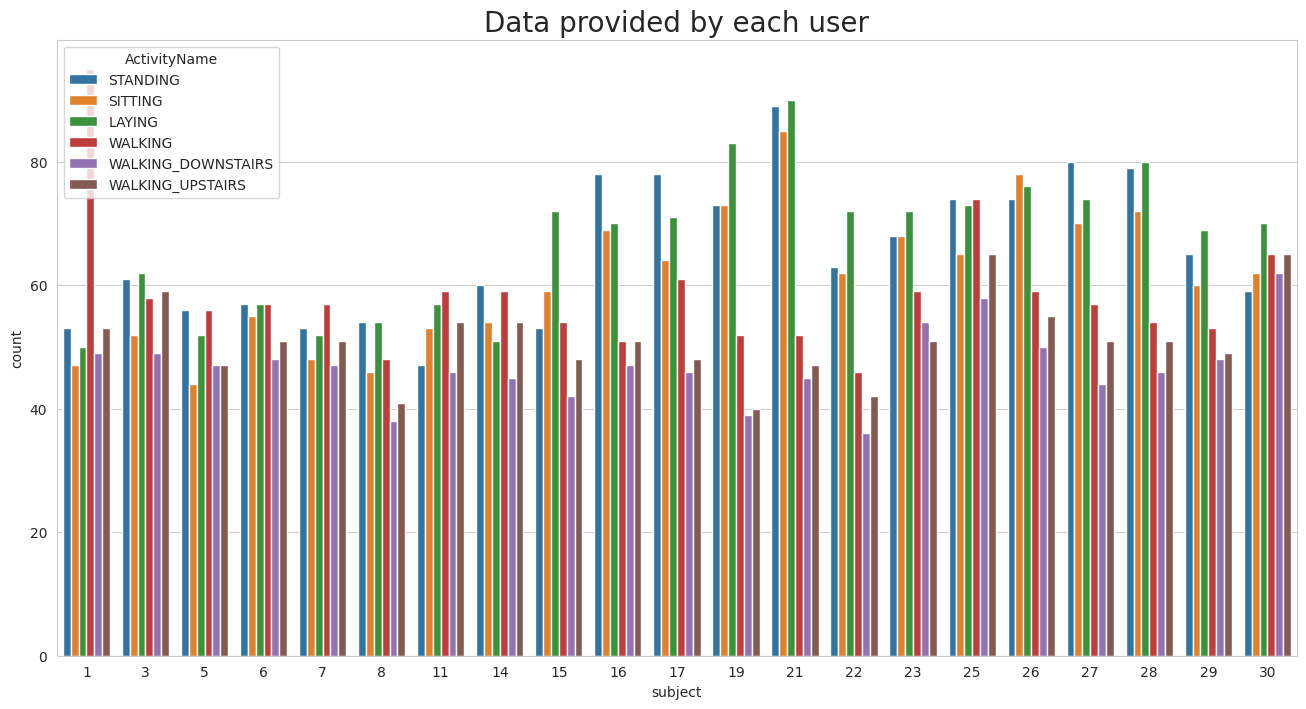

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


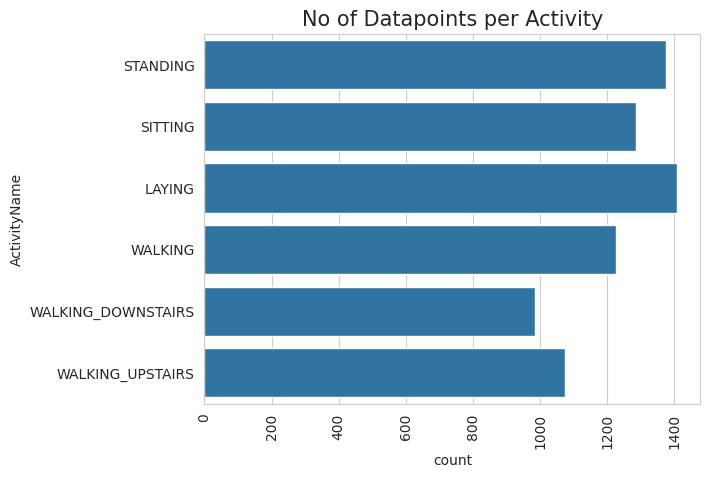

In [14]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [15]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [17]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

In [18]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/pyt

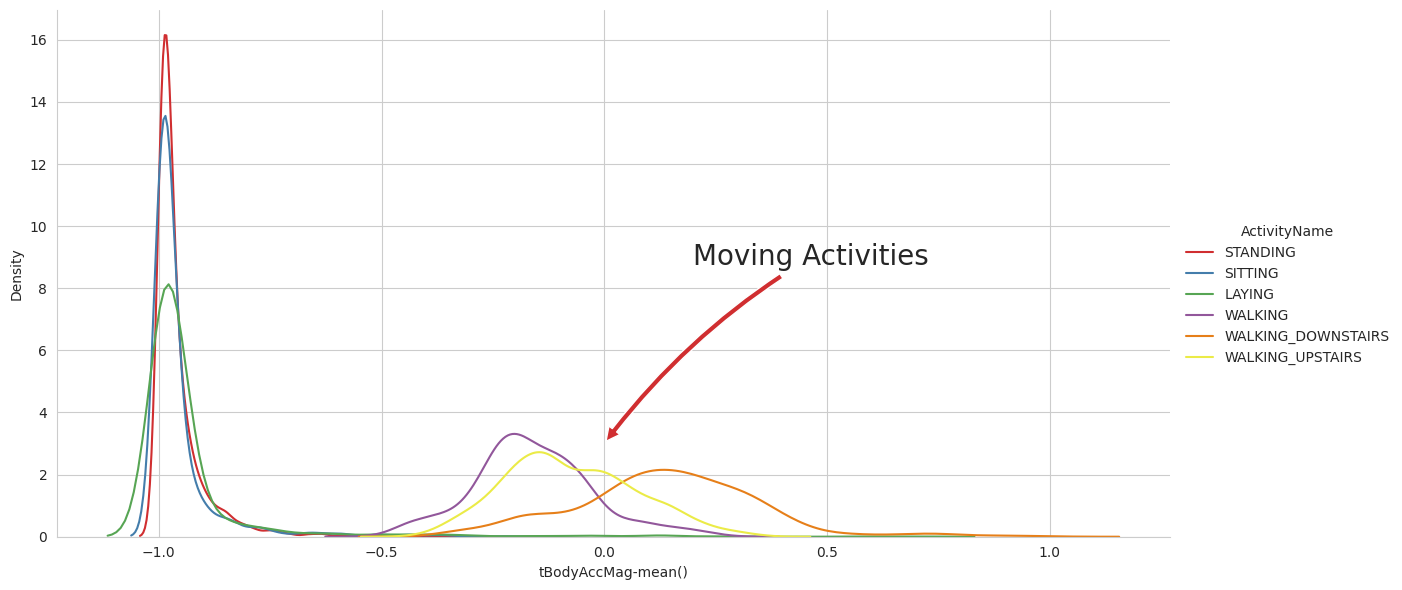

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# The 'size' argument has been replaced by 'height'
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6, aspect=2)
#facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()

# The rest of your code is correct
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))
plt.show()

KeyError: 'tBodyAccMagmean'

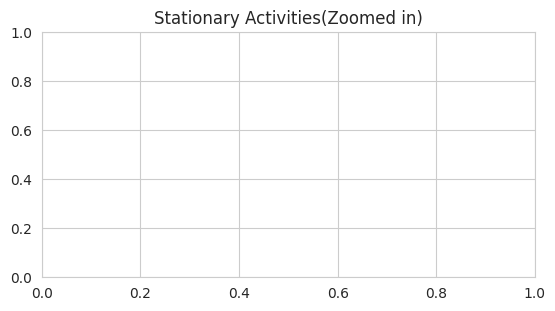

In [20]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

/tmp/ipython-input-1109099098.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['tBodyAccMag-mean()'], color = 'r', hist = False, label = 'Sitting')
/tmp/ipython-input-1109099098.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['tBodyAccMag-mean()'], color = 'm',

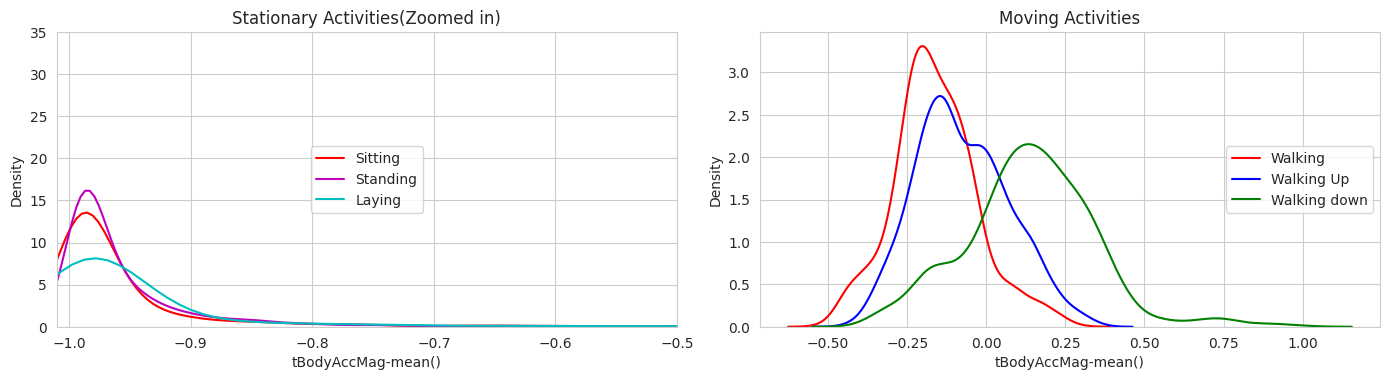

In [23]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
# Correcting the column name to the proper 'tBodyAccMag-mean()'
sns.distplot(df4['tBodyAccMag-mean()'], color = 'r', hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag-mean()'], color = 'm', hist = False, label = 'Standing')
sns.distplot(df6['tBodyAccMag-mean()'], color = 'c', hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
# Correcting the column name to the proper 'tBodyAccMag-mean()'
sns.distplot(df1['tBodyAccMag-mean()'], color = 'red', hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag-mean()'], color = 'blue', hist = False, label = 'Walking Up')
sns.distplot(df3['tBodyAccMag-mean()'], color = 'green', hist = False, label = 'Walking down')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

In [24]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret value `tBodyAccMagmean` for `y`. An entry with this name does not appear in `data`.

<Figure size 700x700 with 0 Axes>

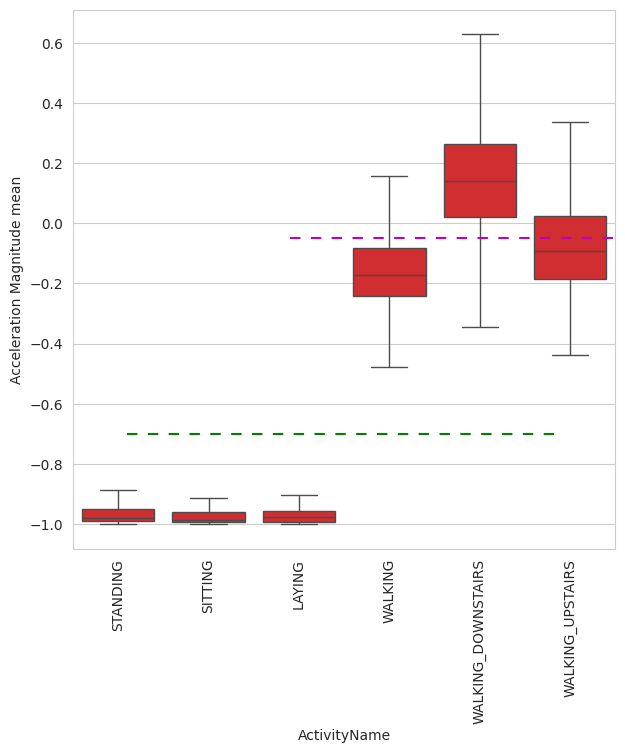

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
# Correcting the column name to the proper 'tBodyAccMag-mean()'
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()', data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [26]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

ValueError: Could not interpret value `angleXgravityMean` for `y`. An entry with this name does not appear in `data`.

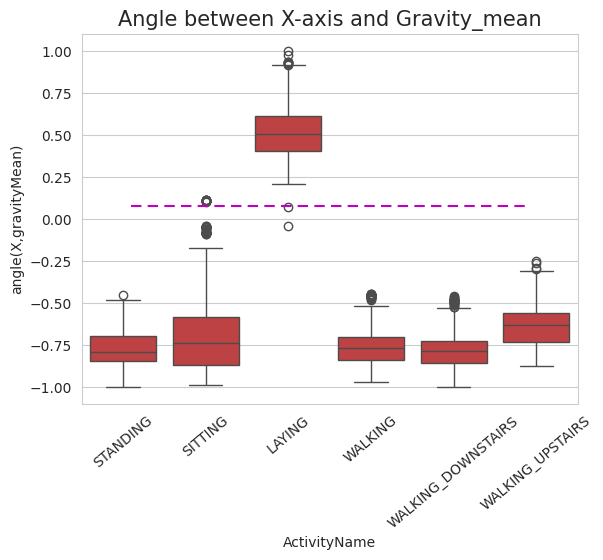

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

In [28]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

ValueError: Could not interpret value `angleYgravityMean` for `y`. An entry with this name does not appear in `data`.

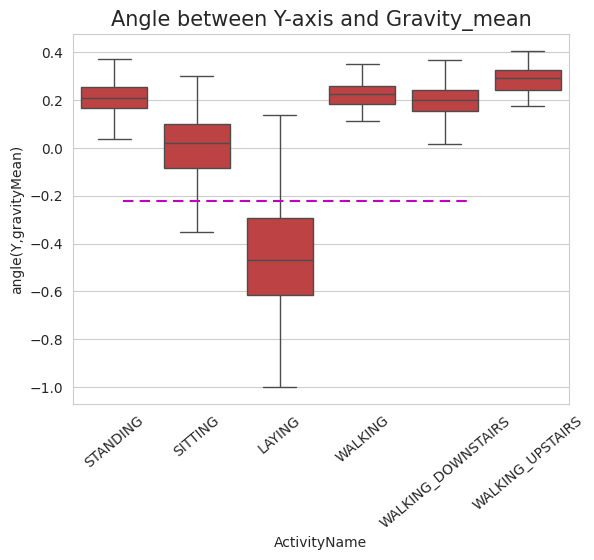

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='ActivityName', y='angle(Y,gravityMean)', data=train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [30]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [32]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.028s...
[t-SNE] Computed neighbors for 7352 samples in 2.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.036s
[t-SNE] Iteration 50: error = 119.3363190, gradient norm = 0.0429752 (50 iterations in 7.357s)
[t-SNE] Iteration 100: error = 105.1692581, gradient norm = 0.0234385 (50 iterations in 

TypeError: lmplot() got an unexpected keyword argument 'size'

In [33]:
# The corrected line for the lmplot call
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,
           palette="Set1", markers=['^','v','s','o', '1','2'])

NameError: name 'df' is not defined

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assume X_data and y_data are passed to this function
def perform_tsne(X_data, y_data, perplexities, n_iter=1000):
    for perplexity in perplexities:
        # Perform t-SNE
        tsne_results = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter).fit_transform(X_data)

        # Create the 'df' DataFrame
        # This is the crucial step you were missing
        df = pd.DataFrame(tsne_results, columns=['x', 'y'])
        df['label'] = y_data

        # Now you can safely call lmplot with the 'df' DataFrame
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,
                   palette="Set1", markers=['^','v','s','o', '1','2'])
        plt.title(f"perplexity : {perplexity} and max_iter : {n_iter}")
        plt.show()

# Example of how you would call the function after preparing your data
# X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
# y_pre_tsne = train['ActivityName']
# perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2, 5, 10, 20, 50])

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


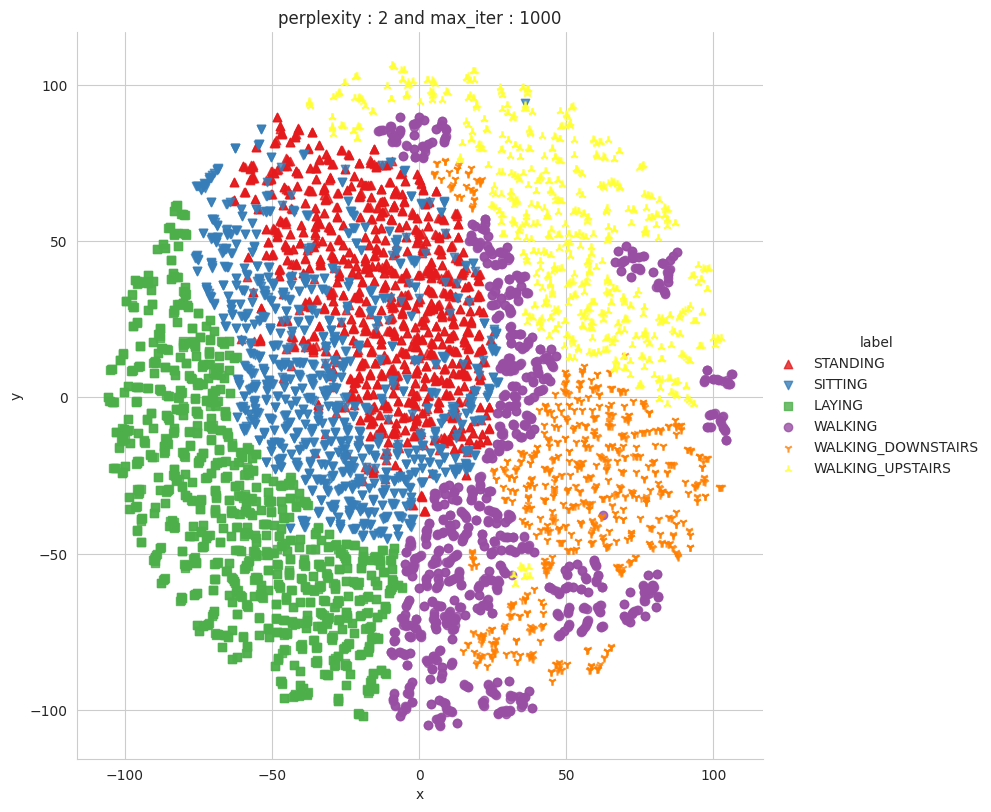

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


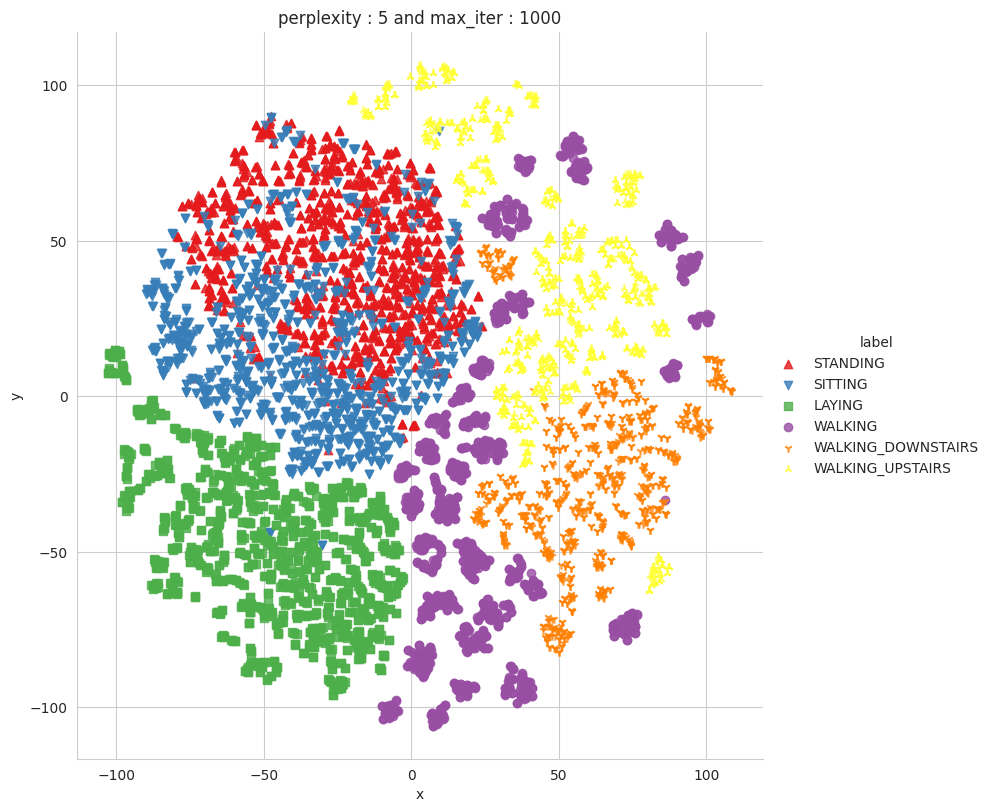

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


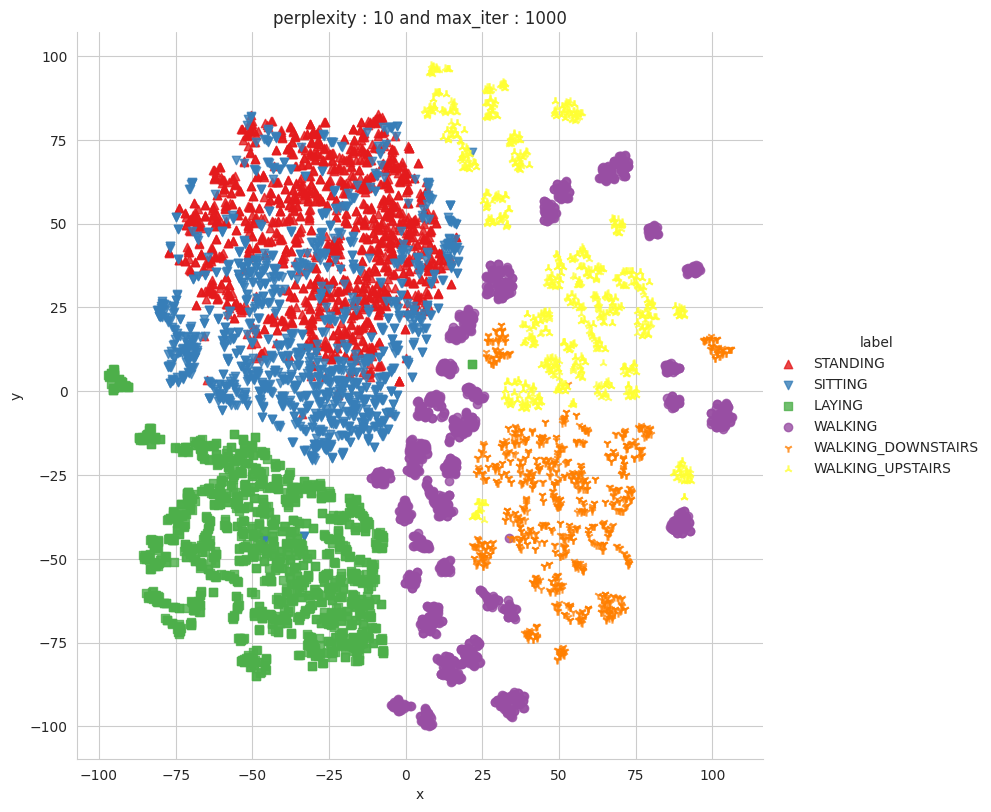

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


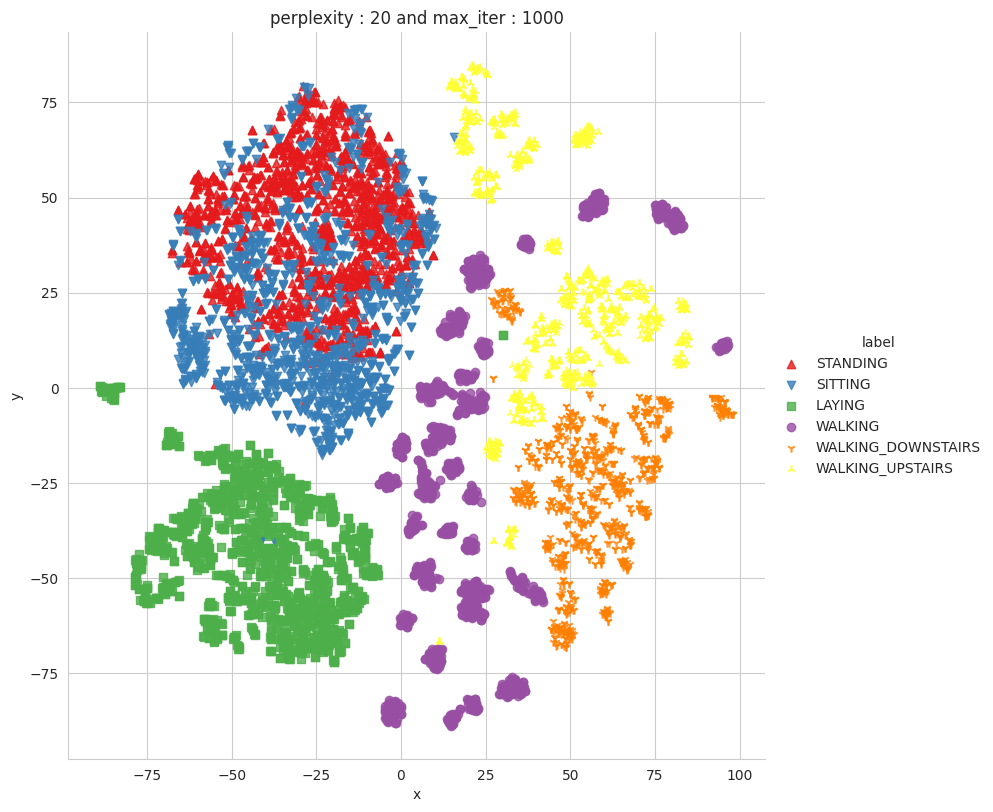

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


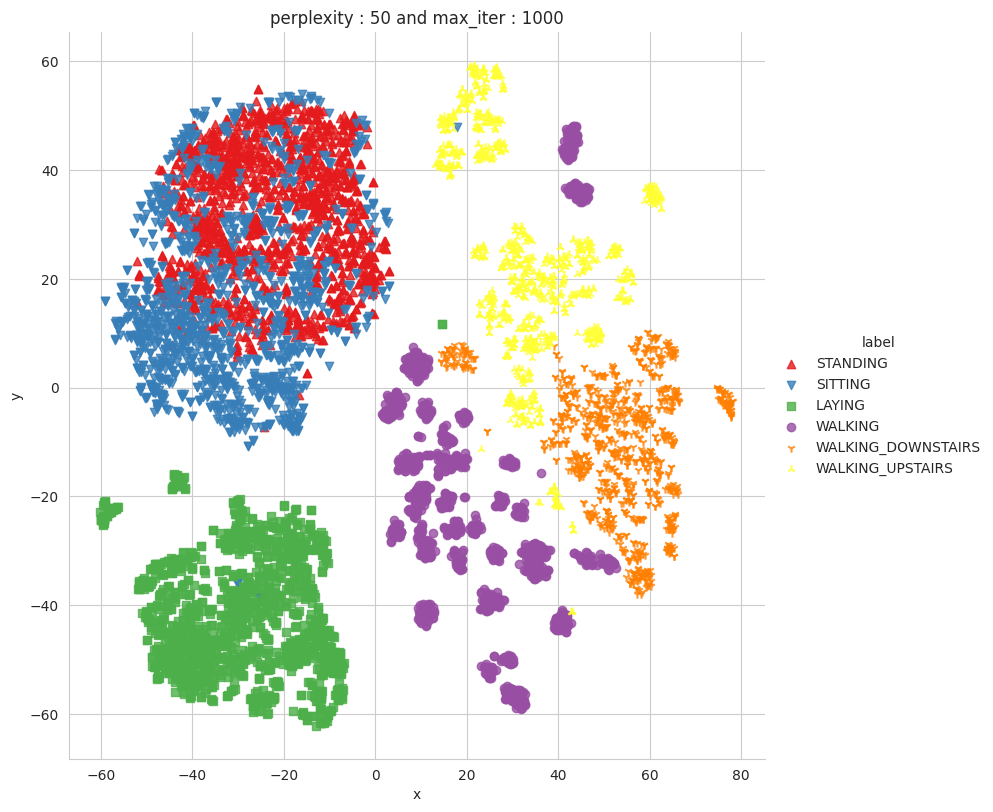

In [35]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])